In [145]:
import pandas as pd

gpb=pd.read_csv('data/gpb.csv',encoding="shift-jis")
gpt=pd.read_csv('data/gp_each10min.csv',encoding="shift-jis")

In [355]:
import csv
with open('data/output/Matome.csv', 'a+',encoding='shift_jis',newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["局","曜日","時刻","レギュラー番組名","RMSE誤差","MAPE誤差率","SARIMAモデルのパラメータ",
                     "期間内レギュラー番組放送率","予測に使うデータのレギュラー番組率","OUTPUTファイル名"])

In [366]:
#抽出データを指定
select_TV="FTV"
select_Week="月"
select_Time="19:10:00"
Time_split=select_Time.split(":")
SaveFileName=select_TV+"_"+select_Week+Time_split[0]+Time_split[1]

In [322]:
#局データを選ぶ
df_ftv=gpt.loc[(gpt['局'] == select_TV)]
df_ftv_rates=df_ftv[["datetime","視聴率（世帯）","曜日","timestamp"]]

#save datetime series as datetime formart
df_ftv_rates["datetime"]=pd.to_datetime(df_ftv_rates.datetime)
#set datetime series as index
df_ftv_rates=df_ftv_rates.set_index('datetime')
df_ftv_rates.tail()      

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,視聴率（世帯）,曜日,timestamp
datetime,,,
2019-12-31 22:10:00,4.70,火,1577830200
2019-12-31 22:20:00,7.00,火,1577830800
2019-12-31 22:30:00,5.90,火,1577831400
2019-12-31 22:40:00,5.00,火,1577832000
2019-12-31 22:50:00,5.90,火,1577832600


In [323]:
#曜日・時刻データを選ぶ
df_loc=df_ftv_rates.loc[(df_ftv_rates['曜日'] == select_Week)]
locs=df_loc.index.indexer_at_time(select_Time)
ts_loc=df_loc.iloc[locs]

#データに番組情報を追加
ftv_code=[]
ftv_title=[]

for index,row in ts_loc.iterrows():
    t=row.timestamp
    for a,b,c in zip(gpb.datetimets,gpb.endtimets,gpb["Unnamed: 0"]):
        if t in range(a,b):
            if gpb["局"][c]==select_TV:
                ftv_code.append(gpb["番組分類コード"][c])
                ftv_title.append(gpb["メインタイトル"][c])
            else:
                pass
        else:
            pass
                
ts_loc["番組分類コード"]=ftv_code
ts_loc["メインタイトル"]=ftv_title
ts_loc

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,視聴率（世帯）,曜日,timestamp,番組分類コード,メインタイトル
datetime,,,,,
2017-01-02 19:10:00,7.00,月,1483384200,190,新春スカッとジャパン内村もドラマに登場！３時間半ＳＰ
2017-01-09 19:10:00,7.40,月,1483989000,190,ネプリーグＳＰ・林先生が全問出題！インテリ芸能人常識ランキン
2017-01-16 19:10:00,5.10,月,1484593800,190,痛快ＴＶスカッとジャパン嫌なオンナ撃退２時間ＳＰ
2017-01-23 19:10:00,7.50,月,1485198600,190,ネプリーグＳＰ・林先生ＶＳ１１人の最強インテリ芸能人！冬の陣
2017-01-30 19:10:00,7.80,月,1485803400,190,ネプリーグ
2017-02-06 19:10:00,8.20,月,1486408200,190,ネプリーグ
2017-02-13 19:10:00,7.60,月,1487013000,190,ネプリーグ
2017-02-20 19:10:00,6.50,月,1487617800,190,ネプリーグ
2017-02-27 19:10:00,7.30,月,1488222600,190,ネプリーグＳＰ・林先生ｖｓ１１人のブレイク女性芸能人！女のプ


In [362]:
#レギュラー番組の検定
import collections
c=collections.Counter(ftv_title)
dc={}
for k,v in c.most_common(100):   # 一度pd.Seriesに変換
    dc[k]=v

rbg=pd.DataFrame(pd.Series(dc),columns=["期間内放送回数"])
bangumi_name=rbg.index[0].replace("\u3000","")
rbg.to_csv('data/output/'+SaveFileName+"_"+"同時刻放送番組一覧"+'.csv',encoding='cp932', index=True, header=False)
print(bangumi_name)
rbg.head(5)

ネプリーグ


,期間内放送回数
ネプリーグ,85
ＦＮＳ番組対抗オールスター春の祭典目利き王決定戦,2
ＦＩＶＢワールドカップバレーボール２０１９女子,2
新春スカッとジャパン内村もドラマに登場！３時間半ＳＰ,1
ネプリーグＳＰ・林先生が全問出題！インテリ芸能人常識ランキン,1


In [342]:
#レギュラー番組のみを抽出して確認
#loc2=ts_loc[ts_loc["メインタイトル"].str.contains("ネプリーグ")]

#イレギュラーの視聴率を2点推定法で修正
import numpy as np

ftv_na=[]
Regular=0

for index,row in ts_loc.iterrows():
    if bangumi_name in row["メインタイトル"]:
        ftv_na.append(row["視聴率（世帯）"])
        Regular+=1
    else:
        ftv_na.append(np.nan)
ts_loc["視聴率（修正）"]=ftv_na
ts_loc=ts_loc.apply(pd.Series.interpolate)

ts_loc

,視聴率（世帯）,曜日,timestamp,番組分類コード,メインタイトル,視聴率（修正）
datetime,,,,,,
2017-01-02 19:10:00,7.00,月,1483384200,190,新春スカッとジャパン内村もドラマに登場！３時間半ＳＰ,nan
2017-01-09 19:10:00,7.40,月,1483989000,190,ネプリーグＳＰ・林先生が全問出題！インテリ芸能人常識ランキン,7.40
2017-01-16 19:10:00,5.10,月,1484593800,190,痛快ＴＶスカッとジャパン嫌なオンナ撃退２時間ＳＰ,7.45
2017-01-23 19:10:00,7.50,月,1485198600,190,ネプリーグＳＰ・林先生ＶＳ１１人の最強インテリ芸能人！冬の陣,7.50
2017-01-30 19:10:00,7.80,月,1485803400,190,ネプリーグ,7.80
2017-02-06 19:10:00,8.20,月,1486408200,190,ネプリーグ,8.20
2017-02-13 19:10:00,7.60,月,1487013000,190,ネプリーグ,7.60
2017-02-20 19:10:00,6.50,月,1487617800,190,ネプリーグ,6.50
2017-02-27 19:10:00,7.30,月,1488222600,190,ネプリーグＳＰ・林先生ｖｓ１１人のブレイク女性芸能人！女のプ,7.30


In [326]:
#途中開始番組について、開始日からデータを抽出

def StartTimeCheck(input_data):
    for n in range(len(ts_loc)):
        if np.isnan(input_data["視聴率（修正）"][n]):
            pass
        else:
            output_data=input_data[n:]
            break
    return output_data

ts_loc_2=StartTimeCheck(ts_loc)

#予測に利用する時系列データ（tsデータ）を作成
ts=ts_loc_2["視聴率（修正）"]
ts_loc_2

,視聴率（世帯）,曜日,timestamp,番組分類コード,メインタイトル,視聴率（修正）
datetime,,,,,,
2017-01-09 19:10:00,7.40,月,1483989000,190,ネプリーグＳＰ・林先生が全問出題！インテリ芸能人常識ランキン,7.40
2017-01-16 19:10:00,5.10,月,1484593800,190,痛快ＴＶスカッとジャパン嫌なオンナ撃退２時間ＳＰ,7.45
2017-01-23 19:10:00,7.50,月,1485198600,190,ネプリーグＳＰ・林先生ＶＳ１１人の最強インテリ芸能人！冬の陣,7.50
2017-01-30 19:10:00,7.80,月,1485803400,190,ネプリーグ,7.80
2017-02-06 19:10:00,8.20,月,1486408200,190,ネプリーグ,8.20
2017-02-13 19:10:00,7.60,月,1487013000,190,ネプリーグ,7.60
2017-02-20 19:10:00,6.50,月,1487617800,190,ネプリーグ,6.50
2017-02-27 19:10:00,7.30,月,1488222600,190,ネプリーグＳＰ・林先生ｖｓ１１人のブレイク女性芸能人！女のプ,7.30
2017-03-06 19:10:00,5.80,月,1488827400,190,痛快ＴＶスカッとジャパンこんな女は嫌われる！？２時間ＳＰ,7.30


In [354]:
RegularRate1=round(Regular/len(ts_loc),3)
RegularRate2=round(Regular/len(ts_loc_2),3)
print("レギュラー番組率1（レギュラー番組数/データセットの週数）：",RegularRate1)
print("レギュラー番組率2（レギュラー番組数/実際に予測に使う番組数）：",RegularRate2)

レギュラー番組率1（レギュラー番組数/データセットの週数）： 0.739
レギュラー番組率2（レギュラー番組数/実際に予測に使う番組数）： 0.744


In [327]:
#定常性検定のスクリプトをインストール
import numpy as np
from scipy import stats

from statsmodels.tsa.stattools import adfuller

# Dickey-Fuller test 結果と標準偏差、平均のプロット
def test_stationarity(timeseries, window_size=12):
    # Determing rolling statistics
    rolmean = timeseries.rolling(window=window_size,center=False).mean()
    rolstd = timeseries.rolling(window=window_size,center=False).std()

    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value',
                                             '#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

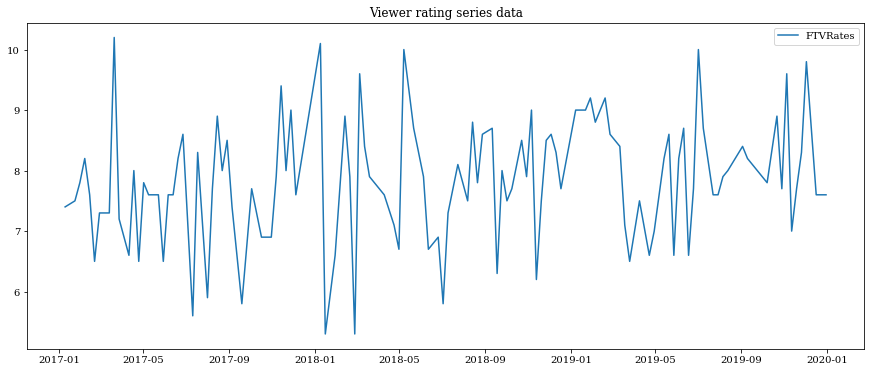

In [328]:
#ローデータをグラフ描画
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

import matplotlib as mpl
mpl.rcParams['font.family'] = ['serif']

plt.plot(ts, label='FTVRates')
plt.title('Viewer rating series data')
plt.legend(loc='best')

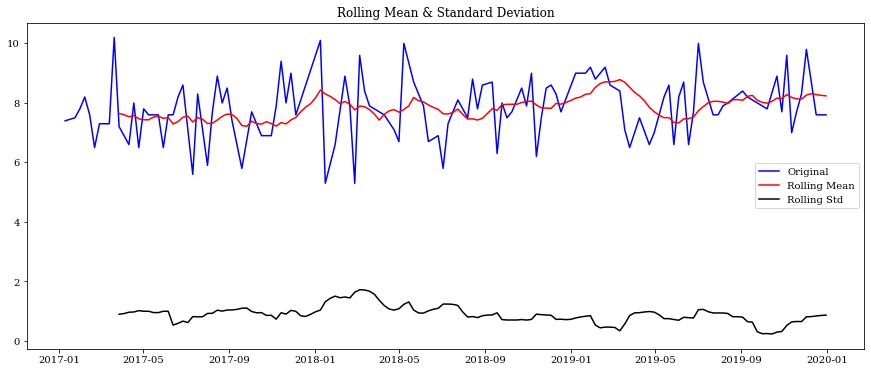

Results of Dickey-Fuller Test:
Test Statistic                 -9.20
p-value                         0.00
#Lags Used                      0.00
Number of Observations Used   155.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64


In [329]:
'''
定常性をチェックするための統計的テストの1つ。
ここで、帰無仮説は、ts が非定常であるということ。
テスト結果は、「検定統計量(Test Statistic)」と1,5,10%の信頼水準の「臨界値(Critical Value)」から構成されます。
「検定統計量」が「臨界値」よりも小さい場合は、帰無仮説を棄却して系列が定常状態と判定。

'''

test_stationarity(ts, window_size=12)


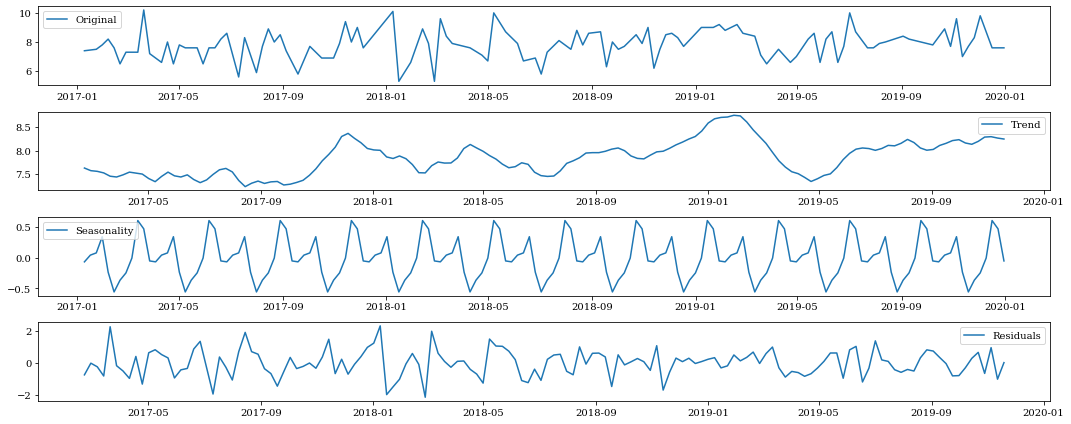

In [330]:

# 傾向(trend)、季節性(seasonal)、残差(residual)に分解してモデル化する。
# https://momonoki2017.blogspot.com/2018/03/python6.html

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts,freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


# オリジナルの時系列データプロット
# 411=グラフ4行1列の1番目の位置（一番上）
plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
 
# trend のプロット
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
 
# seasonal のプロット
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
 
# residual のプロット
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [331]:
# 総当たりで、AICが最小となるSARIMAの次数を探す
max_p = 3
max_d = 1
max_q = 3
max_sp = 1
max_sd = 1
max_sq = 1

pattern = max_p*(max_q + 1)*(max_d + 1)*(max_sp + 1)*(max_sq + 1)*(max_sd + 1)
modelSelection = pd.DataFrame(index=range(pattern), columns=["model", "aic"])

#maxlag should be < nobs always OCCUR in python3, how to fix it?
#https://github.com/statsmodels/statsmodels/issues/4465
#SARIMAX (p,d,q)x(P,D,Q,s)
#d + D*s + max(3*q + 1, 3*Q*s + 1, p, P*s) + 1 observations

s=12
atleast=max_d+max_sd*s+max(3*max_q+1,3*max_sq*s+1,max_p,max_sp,s)+s
print("pattern:",pattern)
print("atleast:",atleast)

pattern: 192
atleast: 62


In [332]:

import statsmodels.api as sm

# 自動SARIMA選択
num = 0

for p in range(1, max_p + 1):
    for d in range(0, max_d + 1):
        for q in range(0, max_q + 1):
            for sp in range(0, max_sp + 1):
                for sd in range(0, max_sd + 1):
                    for sq in range(0, max_sq + 1):
                        sarima = sm.tsa.SARIMAX(
                            ts, order=(p,d,q), 
                            seasonal_order=(sp,sd,sq,12), 
                            enforce_stationarity = False, 
                            enforce_invertibility = False
                        ).fit()
                        modelSelection.iloc[num]["model"] = "order=(" + str(p) + ","+ str(d) + ","+ str(q) + "), season=("+ str(sp) + ","+ str(sd) + "," + str(sq) + ")"
                        modelSelection.iloc[num]["aic"] = sarima.aic
                        num = num + 1

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequenc

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarn

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, Val

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarn

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % fre

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarn

In [333]:
# モデルごとの結果確認
#print(modelSelection)
# AIC最小モデル
min_model=modelSelection[modelSelection.aic == min(modelSelection.aic)]
modelname=list(min_model.model)[0]
modelname

'order=(3,1,3), season=(0,1,1)'

In [334]:
import statsmodels.api as sm

p=int(modelname[7])
d=int(modelname[9])
q=int(modelname[11])
sp=int(modelname[-6])
sd=int(modelname[-4])
sq=int(modelname[-2])

sarima = sm.tsa.SARIMAX(
    ts, order=(p,d,q), 
    seasonal_order=(sp,sd,sq,12), 
    enforce_stationarity = False, 
    enforce_invertibility = False
).fit()
# 結果確認
print(sarima.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                            視聴率（修正）   No. Observations:                  156
Model:             SARIMAX(3, 1, 3)x(0, 1, 1, 12)   Log Likelihood                -176.098
Date:                            Sun, 29 Mar 2020   AIC                            368.195
Time:                                    18:46:28   BIC                            390.949
Sample:                                01-09-2017   HQIC                           377.440
                                     - 12-30-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2947      0.105    -12.351      0.000      -1.500      -1.089
ar.L2         -0.4880      0.139   

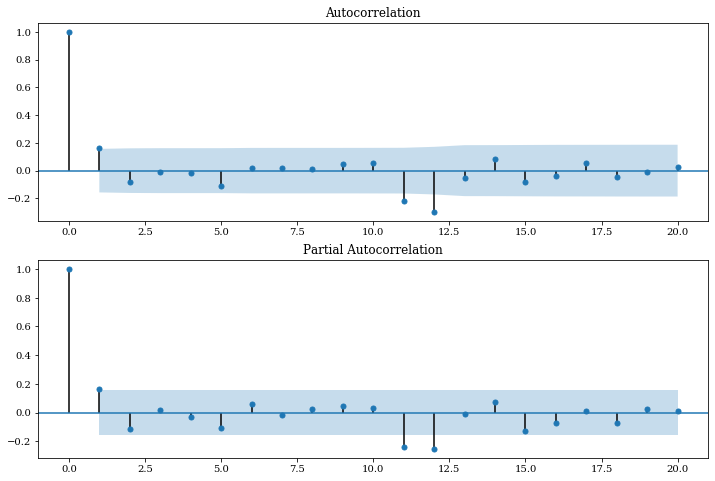

In [336]:
# 残差の自己相関については、ほぼ問題なくなったことを確認

# 残差のチェック
residSARIMA = sarima.resid
fig = plt.figure(figsize=(12,8))

# 自己相関
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residSARIMA, lags=20, ax=ax1)

# 偏自己相関
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residSARIMA, lags=20, ax=ax2)

In [337]:
# 予測
ts_pred = sarima.predict('2019-09-02', '2020-03-23')

predict_dy = sarima.get_prediction(start ='2019-09-02',end='2020-03-23')
predict_dy_ci = predict_dy.conf_int(alpha=0.05) # defalut alpah=0.05 :returns a 95% confidence interval


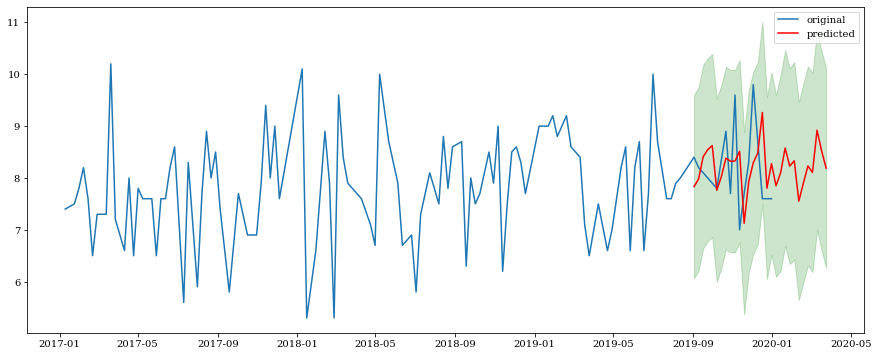

In [338]:
# 実データと予測結果の図示
rcParams['figure.figsize'] = 15, 6
plt.plot(ts, label='original')
plt.plot(ts_pred, label='predicted', color='red')
plt.legend(loc='best')
plt.fill_between(predict_dy_ci.index, predict_dy_ci.iloc[:, 0], predict_dy_ci.iloc[:, 1], color='g', alpha=0.2)

plt.savefig("data/output/"+SaveFileName+"_"+bangumi_name+'.png')

In [339]:
#精度評価(9月-11月で)
p=ts_pred["2019-09":"2019-11"]
t=ts["2019-09":"2019-11"]

g=abs(t-p)
r=g/p*100

#RMSE
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(t, p))
rmse=round(rmse,2)
print("RMSE",rmse)

#MAPE
import numpy as np
mape=np.mean(np.abs((p - t) / t)) * 100
mape=round(mape,2)
print("MAPE",mape)


RMSE 0.7
MAPE 7.26


In [340]:
#時刻別OUTPUTファイルの作成
pd.options.display.float_format = '{:.2f}'.format

df3=pd.DataFrame({"予測視聴率":ts_pred, "実際視聴率":t,"誤差":g,"誤差率（%）":r})
df3.index.name = "日付"
df3=df3.reset_index()
df3["局"]=select_TV
df3["レギュラー番組"]=bangumi_name
df3=df3[["局","日付","レギュラー番組","予測視聴率","実際視聴率","誤差","誤差率（%）"]]
df3.to_csv('data/output/'+SaveFileName+"_"+bangumi_name+'.csv',encoding='cp932', index=False)
df3

,局,日付,レギュラー番組,予測視聴率,実際視聴率,誤差,誤差率（%）
0,FTV,2019-09-02 19:10:00,ネプリーグ,7.83,8.40,0.57,7.25
1,FTV,2019-09-09 19:10:00,ネプリーグ,7.98,8.20,0.22,2.77
2,FTV,2019-09-16 19:10:00,ネプリーグ,8.41,8.10,0.31,3.67
3,FTV,2019-09-23 19:10:00,ネプリーグ,8.54,8.00,0.54,6.38
4,FTV,2019-09-30 19:10:00,ネプリーグ,8.62,7.90,0.72,8.40
5,FTV,2019-10-07 19:10:00,ネプリーグ,7.76,7.80,0.04,0.49
6,FTV,2019-10-14 19:10:00,ネプリーグ,8.02,8.35,0.33,4.05
7,FTV,2019-10-21 19:10:00,ネプリーグ,8.38,8.90,0.52,6.16
8,FTV,2019-10-28 19:10:00,ネプリーグ,8.32,7.70,0.62,7.48
9,FTV,2019-11-04 19:10:00,ネプリーグ,8.33,9.60,1.27,15.29


In [356]:
#一覧表を作成
filename=SaveFileName+"_"+bangumi_name
a
with open('data/output/Matome.csv', 'a+',encoding='shift_jis',newline="") as f:
    writer = csv.writer(f)
    writer.writerow([select_TV,select_Week,select_Time,bangumi_name,rmse,mape,modelname,RegularRate1,RegularRate2,filename])

In [40]:
#外れ原因調査

t=loc3["timestamp"]["2019-10-07 19:40:00"]
result=gpb.loc[(gpb.datetimets<t)&(gpb.endtimets>t)]
result.drop(columns=["Unnamed: 0","年","月","日","開始時","開始分","datetimets","endtimets"])


,datetime,曜日,局,放送分数,番組分類コード,新番組コード,占拠率（世帯）,メインタイトル,サブタイトル,endtime
53926,2019-10-07 19:00:00,月,NTV,120,190,,11.50,有吉ゼミ７年目突入祭り！２時間ＳＰ,,2019-10-07 21:00:00
53929,2019-10-07 19:00:00,月,TBS,237,150,,9.40,歌のゴールデンヒット,,2019-10-07 22:57:00
53931,2019-10-07 19:00:00,月,FTV,120,190,,9.80,ネプリーグＳＰディーン・フジオカ＆岩田剛典ｖｓ霜降り明星＆ゆ,,2019-10-07 21:00:00
53935,2019-10-07 19:00:00,月,ANB,168,190,,9.50,帰れマンデー見っけ隊！！３時間スペシャル秘境バス＆帰れま１０,,2019-10-07 21:48:00
53940,2019-10-07 19:00:00,月,TX,120,190,,6.10,ＹＯＵは何しに日本へ？スペシャル,,2019-10-07 21:00:00
53947,2019-10-07 19:30:00,月,NHK1,72,190,,9.60,鶴瓶の家族に乾杯,,2019-10-07 20:42:00
53959,2019-10-07 19:25:00,月,NHK2,25,072,,0.60,＃ジューダイ,,2019-10-07 19:50:00
